# 1-5 Our First Model

In [1]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Set parameters to improve graphic outputs
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
# Read our csv into a pandas dataframe
df = pd.read_csv("../data/texts1.csv")

# Check our results
# df.shape, df.head(), print(df)
print(df.shape, df.columns.tolist())

(11, 3) ['text', 'length', 'lexdiv']


In [3]:
# Create our lists
labels = df.text.tolist()
x = df['length'].tolist()
y = df.lexdiv.tolist()

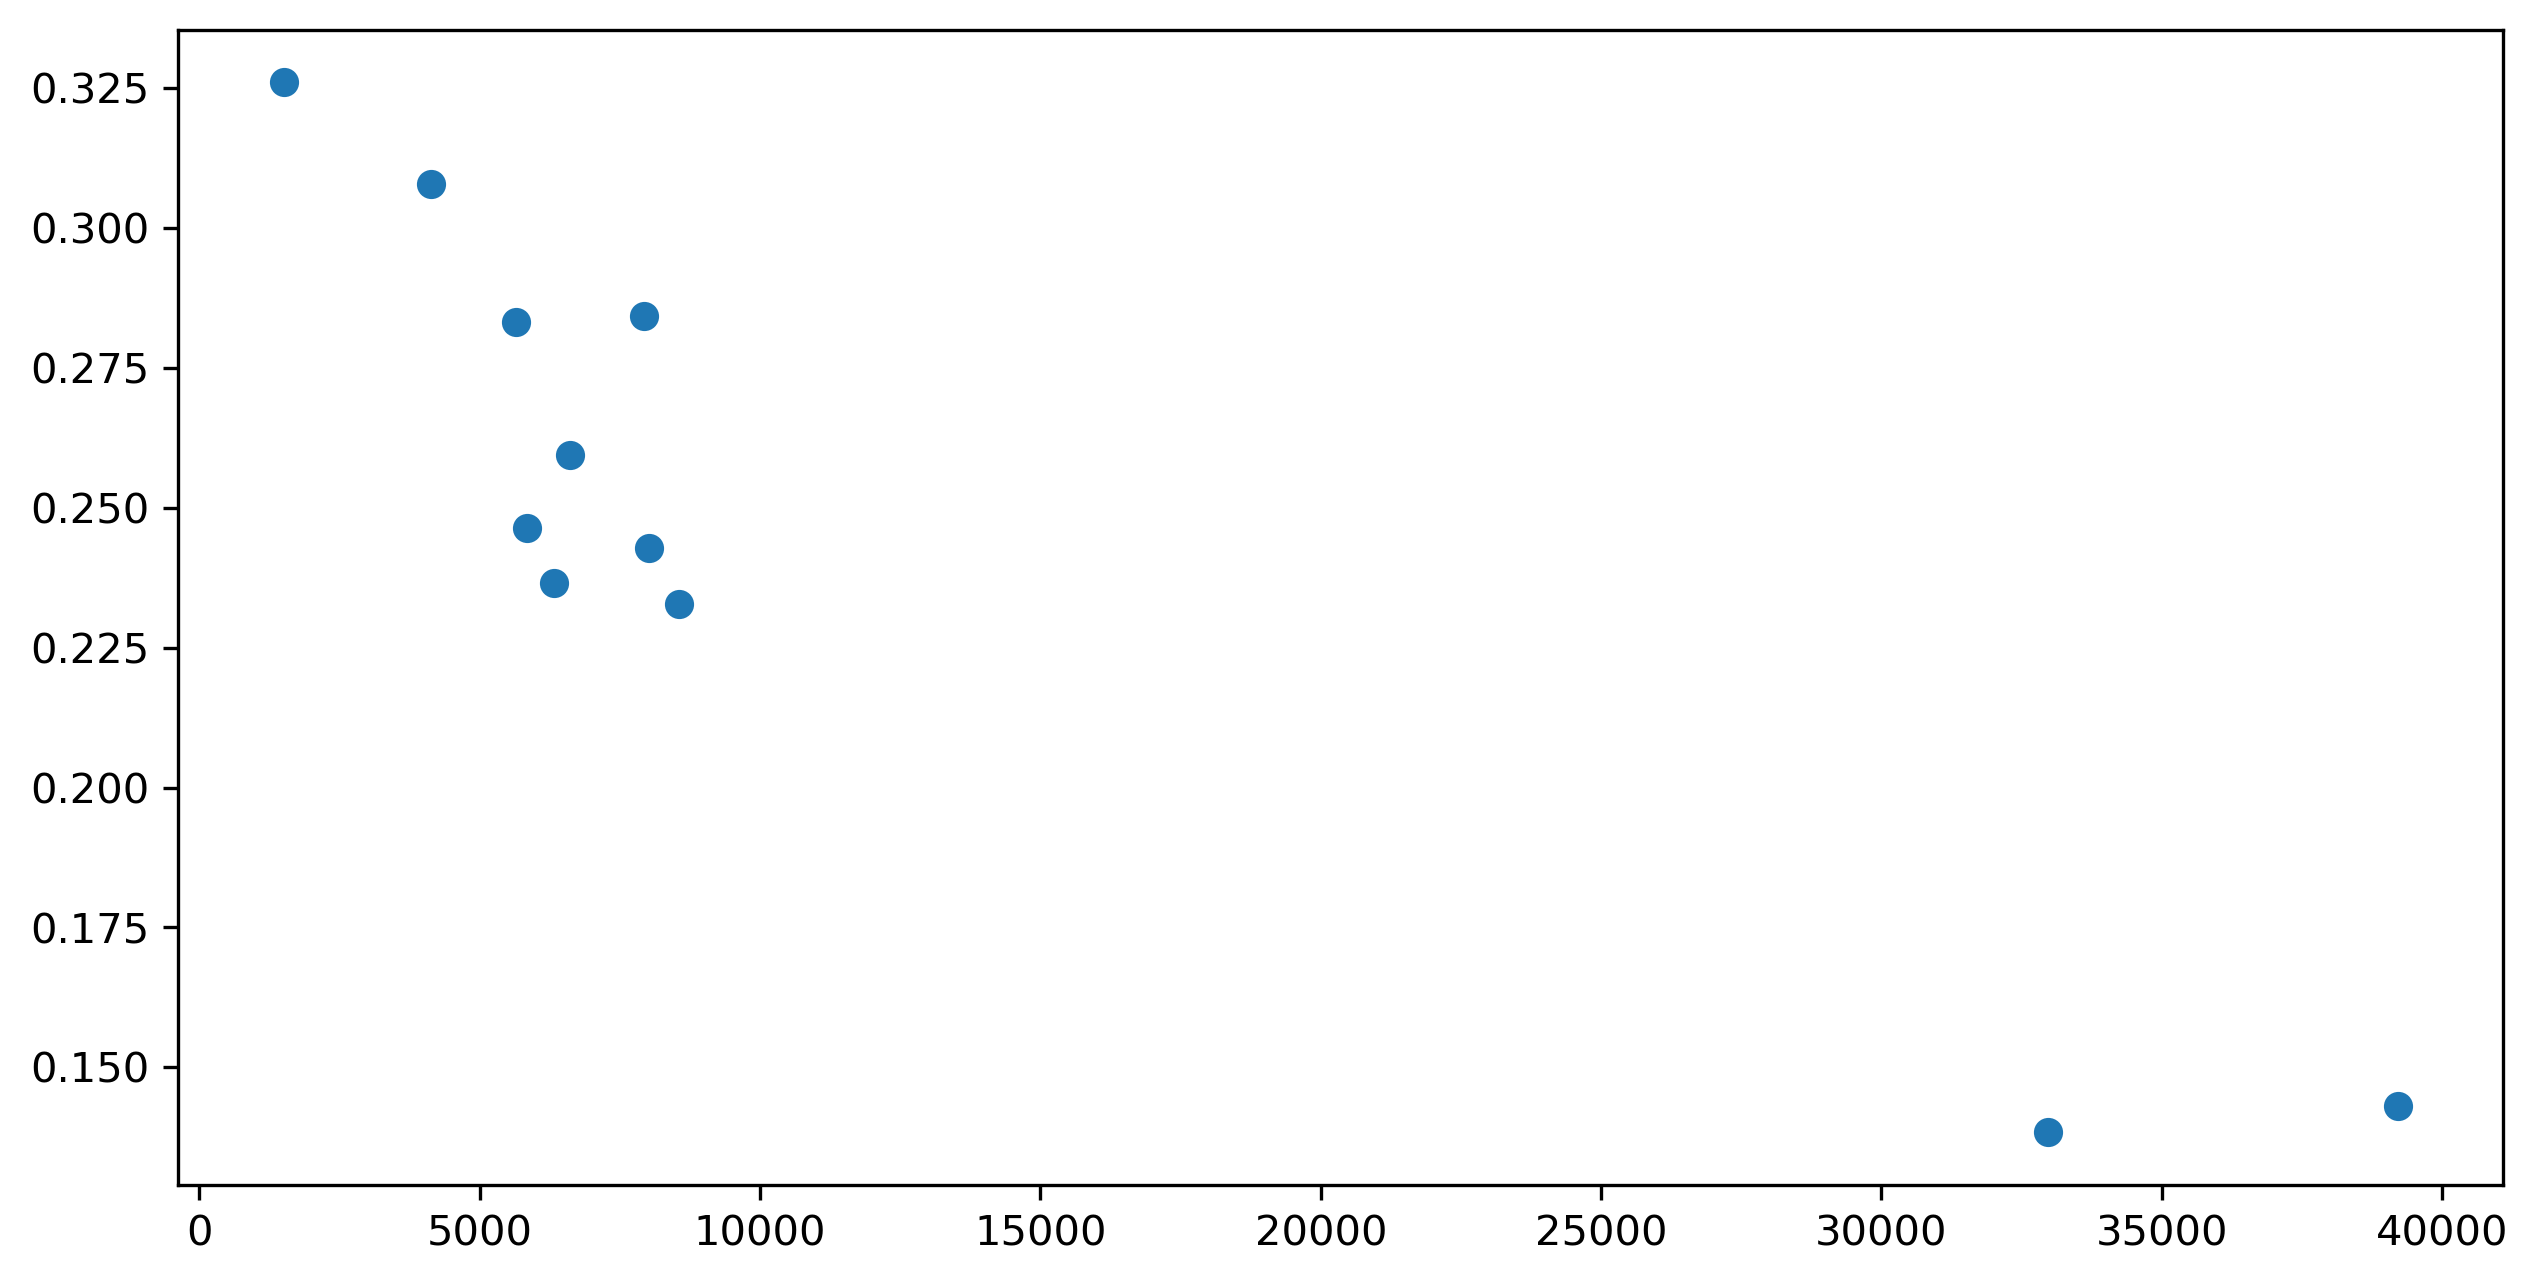

In [4]:
# Quick graph to remind ourselves
plt.scatter(x, y)

In [5]:
# Remember your old friend (or nemesis) y = mx + b?
m, b = np.polyfit(x, y, 1)
print(f"The line has a slope of {m:.7f} and a y-intercept of {b:.3f}.")

The line has a slope of -0.0000044 and a y-intercept of 0.296.


In [6]:
# Get m,b as array
coef = np.polyfit(x, y, 1)
print(type(coef), coef)

<class 'numpy.ndarray'> [-4.39665374e-06  2.96185890e-01]


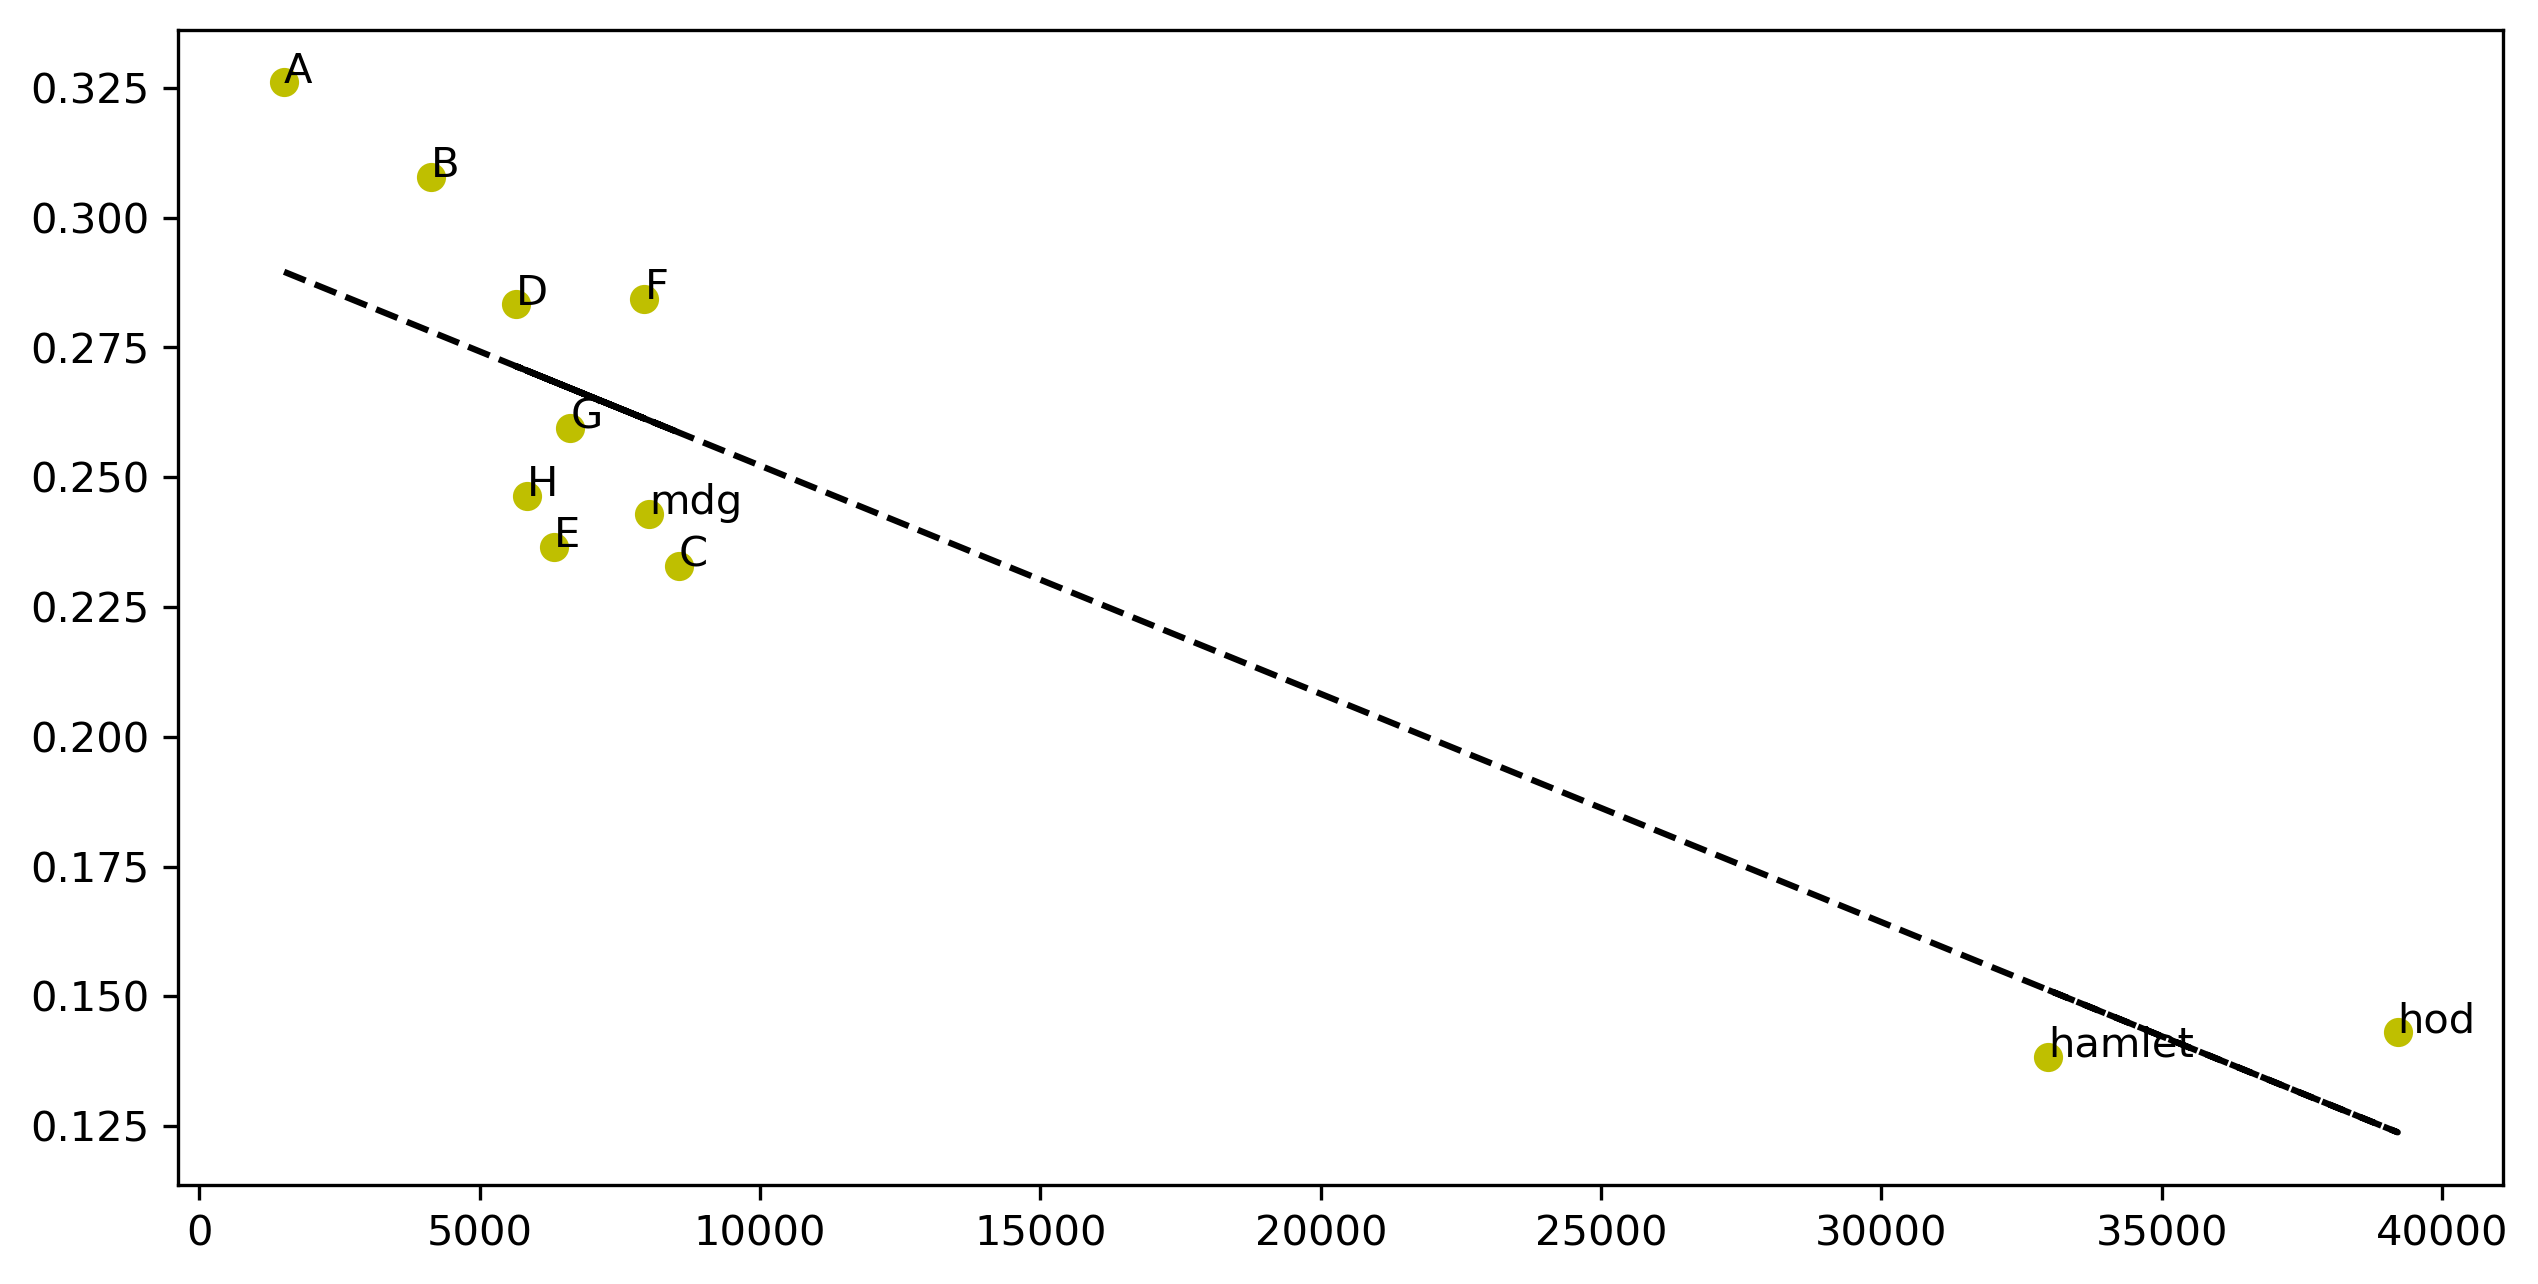

In [7]:

# Create function
poly1d_fn = np.poly1d(coef) 

# Create plot
# Because labeling is borked in mpl
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]))
# '--k'=black dashed line, 'yo' = yellow circle marker
plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') 

# And show it
plt.show()

In [8]:
# To get a detailed breakdown you can use statsmodels
# OLS = Ordinary Least Squares
import statsmodels.api as sm

# model = sm.OLS(y, sm.add_constant(x))
# results = model.fit()

# print(results.summary())

<div class="alert alert-block alert-warning">
<b>Your turn:</b> Below is a new text. Do what you need to do to get its length and then use the function above, <b>poly1d_fn</b>, to test the model's projection of its lexical diversity. How accurate is the model as a percentage of the actual <b>lexdiv</b> score?
</div>

### How I Worked the Problem

In [9]:
# Open file and create string of words
test_file = open('../data/oz.txt').read()
test_words = re.sub("[^a-zA-Z']"," ", test_file).lower().split()

# Use model to predict the lexical diversity
projection = poly1d_fn(len(test_words))

# Get true diversity
lexdiv = len(set(test_words)) / len(test_words)

# Compile the results
print(f"The test document is {len(test_words)} words long.")
print(f"The model predicts a lexical diversity of {projection}.")
print(f"The true diversity is {lexdiv}.")

The test document is 40183 words long.
The model predicts a lexical diversity of 0.1195151527566394.
The true diversity is 0.07435980389717045.
